#### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Reading the dataset

In [3]:
df = pd.read_csv("Fuel Consumption Ratings.csv")

#### Data Exploration

In [5]:
# Describe the dataset
df.describe()

,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMP_CITY_LPER100KM,FUELCONSUMP_HWY_LPER100KM,FUELCONSUMP_COMB_LPER100KM,FUELCONSUMP_COMB_MPG,CO2EMISSIONS
count,1030.0,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,2010.0,3.556311,6.075728,14.280777,10.225534,12.453495,24.156311,278.017476
std,0.0,1.341342,1.961756,3.902699,2.571292,3.271665,6.022942,63.077148
min,2010.0,1.000000,2.000000,4.700000,4.900000,4.800000,11.000000,110.000000
25%,2010.0,2.500000,4.000000,11.600000,8.500000,10.200000,20.000000,235.000000
50%,2010.0,3.500000,6.000000,13.500000,9.600000,11.700000,24.000000,267.000000
75%,2010.0,4.600000,8.000000,16.100000,11.700000,14.100000,28.000000,320.000000
max,2010.0,8.400000,16.000000,30.000000,19.900000,24.600000,59.000000,566.000000


##### Inferences from the above command result. 
###### We can find the total count as 1030 records and hence no missing values in any of the fields.
###### We can also find the average value of each column. Here MODEL column has no significance since its the year field. 
###### Average CO2 emission value is 278.01 g/km
###### Similarly we can find th minimum and maximum values of each feature. - Minimum CO2 emission levle is 110 g/km and maximum is 566 g/km
###### Upon seeing the 25%, 50% and 75% values of all the fields except MODEL, it is identified that the plotting of these fields looks almost bell curve but may not be evenly distributed 



In [8]:
# Sample Data
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMP_CITY_LPER100KM,FUELCONSUMP_HWY_LPER100KM,FUELCONSUMP_COMB_LPER100KM,FUELCONSUMP_COMB_MPG,CO2EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


#### Select important Features

In [78]:
# As per the metadata - Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are 
# based on fuel type and the combined fuel consumption rating.
df_feature = df[["FUELCONSUMP_COMB_LPER100KM","FUEL","CO2EMISSIONS"]]

In [57]:
df_feature.head()

,FUELCONSUMP_COMB_LPER100KM,FUEL,CO2EMISSIONS
0,9.5,X,219
1,8.9,X,205
2,10.0,Z,230
3,13.2,Z,304
4,11.9,Z,274


#### Identifying missing values

In [58]:
# Identify if any null values
df_feature.isnull().sum()

FUELCONSUMP_COMB_LPER100KM    0
FUEL                          0
CO2EMISSIONS                  0
dtype: int64

In [59]:
# Identify if any "?" values
df_feature.isin(["?"]).sum()

FUELCONSUMP_COMB_LPER100KM    0
FUEL                          0
CO2EMISSIONS                  0
dtype: int64

In [60]:
# Identify if any "? " values
df_feature.isin(["? "]).sum()

FUELCONSUMP_COMB_LPER100KM    0
FUEL                          0
CO2EMISSIONS                  0
dtype: int64

#### There are no missing values

#### We can do plotting of these features in histrogram

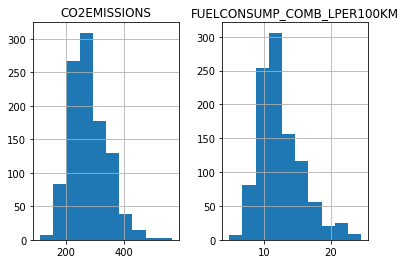

In [62]:
viz = df_feature[["FUELCONSUMP_COMB_LPER100KM","FUEL","CO2EMISSIONS"]]
viz.hist()
plt.show()

#### We can do plotting of these features against the emission to check the linear relation

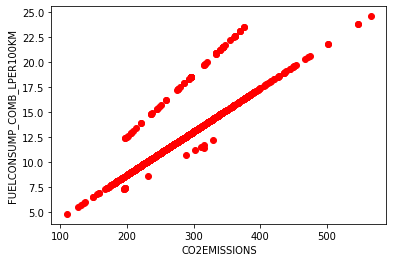

In [63]:
plt.scatter(df_feature.CO2EMISSIONS, df_feature.FUELCONSUMP_COMB_LPER100KM,  color='red')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("FUELCONSUMP_COMB_LPER100KM")
plt.show()

#### The relationship between CO2 emission and fuel combination seems tobe linear.

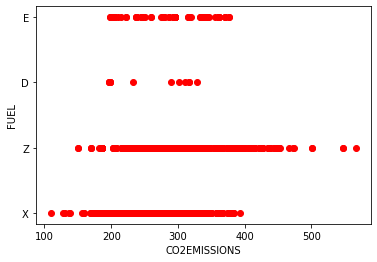

In [64]:
plt.scatter(df_feature.CO2EMISSIONS, df_feature.FUEL,  color='red')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("FUEL")
plt.show()

#### Fuel is a categorical field. From the above plot we see that X ( Regular gasoline) and Z (Premium gasoline) are the ones 
#### which emit more CO2 compared to D (Diesel)

#### Handling Categorical Field - Fuel - Dummy Encoding
#### Removing the FUEL variable and replacing it with dummy variables

In [79]:
df_feature = pd.concat([df_feature.drop('FUEL', axis=1), pd.get_dummies(df['FUEL'])], axis=1)

In [80]:
df_feature.head()

,FUELCONSUMP_COMB_LPER100KM,CO2EMISSIONS,D,E,X,Z
0,9.5,219,0,0,1,0
1,8.9,205,0,0,1,0
2,10.0,230,0,0,0,1
3,13.2,304,0,0,0,1
4,11.9,274,0,0,0,1


In [ ]:
#### Finding the correlation between fuel, combined fuel consumption (l/100 km) againt CO2 emission

In [87]:
df_feature[['D', 'E', 'X','Z','FUELCONSUMP_COMB_LPER100KM','CO2EMISSIONS']].corr()['CO2EMISSIONS'][:]

D                            -0.055491
E                             0.084113
X                            -0.287996
Z                             0.263720
FUELCONSUMP_COMB_LPER100KM    0.894002
CO2EMISSIONS                  1.000000
Name: CO2EMISSIONS, dtype: float64

#### The above correlation value determines that fuel type Diesel has very significant relation with target. Where as Z (Premium gasoline)
#### and E (Ethanol) has slight positive relationship with the target
#### FUEL CONSUMPTION COMBINED (HIGHWAY and CITY (45%)) has strong positie relation with target
#### Hence removing the FUEL feature from the dataset

#### Train and Test Split

In [81]:
# import the libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [159]:
# Creating dataframe with independent variables only
X = df_feature[['FUELCONSUMP_COMB_LPER100KM']]

In [103]:
# Creating dataframe with dependent (or) response variable only
Y = df_feature['CO2EMISSIONS']

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [132]:
lreg = linear_model.LinearRegression()

In [133]:
lreg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
# The coefficients
print ('Coefficients: ', lreg.coef_)
print ('Intercept: ',lreg.intercept_)

Coefficients:  [[16.85436255]]
Intercept:  [67.36771007]


In [143]:
type(X_train)

numpy.ndarray

#### The coefficient of carbon dioxide emission is 16.854
#### The intercept (or) constant in slope equation is 67.367
#### i.e. Y^ = mX + C
#### i.e Y^ = 16.854 * X + 67.367 --> is the simple linear equation that we have derived to get the best fit line  with minimum MSE (Mean Squared Error)


## We can plot the best fit line derived against the actual train dataset points

Text(0, 0.5, 'CO2 Emission')

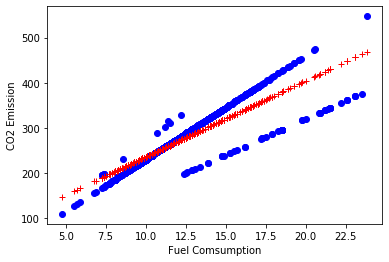

In [154]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train, lreg.coef_*X_train + lreg.intercept_, 'r+')
plt.xlabel("Fuel Comsumption")
plt.ylabel("CO2 Emission")

#### Evaluation of the model

In [155]:
#### Predicting the target values for the test data - X_test

In [156]:
from sklearn.metrics import r2_score
import math
Y_predict = lreg.predict(X_test)

#### printing Y_test and Y_predict values

Text(0, 0.5, 'CO2 Emission')

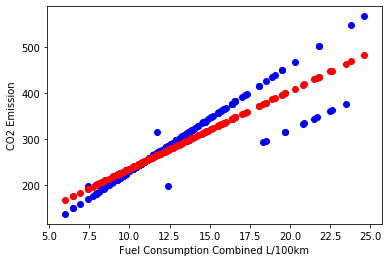

In [157]:
plt.scatter(X_test, Y_test,  color='blue')
plt.scatter(X_test, Y_predict,  color='red')
plt.xlabel("Fuel Consumption Combined L/100km")
plt.ylabel("CO2 Emission")

In [158]:
MAE = round(np.mean(np.absolute(Y_test - Y_predict)))
MSE = round(np.mean((Y_test - Y_predict)**2))
print("Mean Absolute Error = {}".format(MAE))
print("Mean Square Error = {}".format(MSE))
print("R Square = ",r2_score(Y_predict,Y_test))

Mean Absolute Error = 20.0
Mean Square Error = 872.0
R Square =  0.7741633954614717
